In [112]:
import pandas as pd
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('F:/HLL/SpatialCell')
import seaborn as sns

In [113]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [114]:
from SpatialCell.tool import read as sr
from SpatialCell.tool import  annotation
from SpatialCell.plot import density_plot,shape
from SpatialCell.tool import morphological

In [34]:
import importlib
importlib.reload(sr) 
importlib.reload(annotation) 
importlib.reload(density_plot) 
importlib.reload(morphological) 

<module 'SpatialCell.tool.morphological' from 'F:\\HLL/SpatialCell\\SpatialCell\\tool\\morphological.py'>

In [115]:
adata = sc.read_h5ad('F:/HLL/SpatialCell/data/annotated.h5ad')

<Axes: xlabel='Centroid X µm', ylabel='Centroid Y µm'>

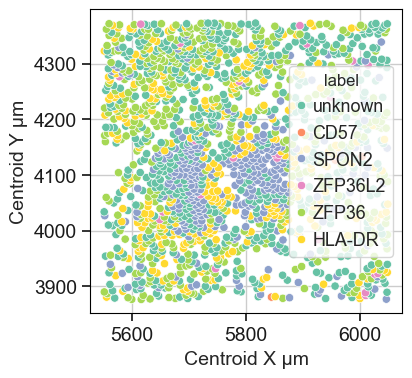

In [116]:
sub = adata[(adata.obs['Image'] == '1932246') & (adata.obs['Parent'] == 'TC5') ] 
df = sub.obs[['Centroid X µm', 'Centroid Y µm', 'label']]
sns.scatterplot(data=df, 
                x='Centroid X µm', 
                y='Centroid Y µm', 
                hue='label', palette='Set2')


In [117]:
df = df[df['label'] == 'SPON2']
point = np.array(df[['Centroid X µm', 'Centroid Y µm']])

<Axes: xlabel='Centroid X µm', ylabel='Centroid Y µm'>

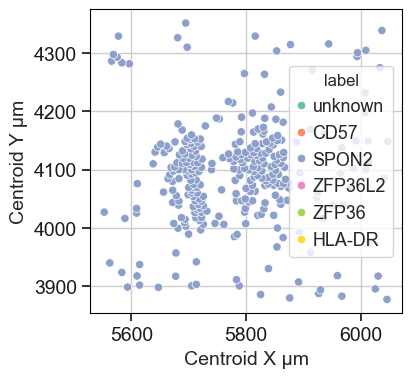

In [118]:
sns.scatterplot(data=df, 
                x='Centroid X µm', 
                y='Centroid Y µm', 
                hue='label', palette='Set2')


In [119]:
fitter_point = morphological.filtered(point , 0.95)
alpha_shape,masks,a,p,curl,elongation,linearity = morphological.com(fitter_point, 0.03)
fitter_point = fitter_point-[alpha_shape.bounds[0],alpha_shape.bounds[1]]

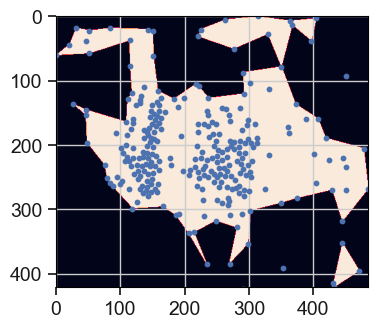

In [120]:
plt.scatter(point[:,0],point[:,1],c='r' ,s =10)
plt.scatter(fitter_point[:,0],fitter_point[:,1],c='b',s =10)
plt.imshow(masks)

In [122]:
morphological.shape(adata, 'SPON2',id = 'Image', batch = 'Parent',)

Image:2003356 Parent:TC2 not have filtered points
Image:2003356 Parent:TC1 not have filtered points
Image:2003356 Parent:TC1 not have a shape
Image:2003803-1 Parent:TC1 not have filtered points
Image:2003803-1 Parent:TC1 not have a shape
Image:2140864 Parent:TC3 not have filtered points


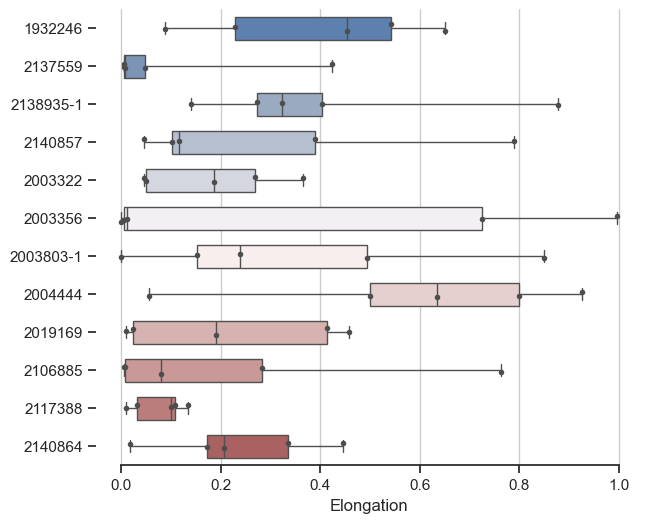

In [123]:
shape.boxplot(adata,'shape_SPON2' , 'Elongation')

In [124]:
adata.write_h5ad('F:/HLL/SpatialCell/data/shaped.h5ad')